In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# for hiding warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\user\Downloads\cargoflash\data\kc_house_data.csv')
pd.set_option('max_columns', None)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


    Variables Description Data Type
    id a notation for a house Numeric
    date Date house was sold String
    price Price is prediction target Numeric
    bedrooms Number of Bedrooms/House Numeric
    bathrooms Number of bathrooms/bedrooms Numeric
    sqftliving square footage of the home Numeric sqftlot square footage of the lot Numeric
    floors Total floors (levels) in house Numeric
    waterfront House which has a view to a waterfront Numeric
    view Has been viewed Numeric

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
data.drop('id',inplace=True,axis=1)
data.drop('date',inplace=True,axis=1)
data.drop('yr_built',inplace=True,axis=1)
data.drop('yr_renovated',inplace=True,axis=1)
data.drop('zipcode',inplace=True,axis=1)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


In [6]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [8]:
data.describe(percentiles = [.25,.5,.75,.90,.95,.99])
#data["price"].max()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
90%,8.870000e+05,4.000000,3.000000,3254.000000,2.137160e+04,2.000000,0.000000,0.000000,4.000000,9.000000,2950.000000,970.000000,47.727900,-122.022000,2930.000000,17822.000000
95%,1.160000e+06,5.000000,3.500000,3760.000000,4.330720e+04,2.000000,0.000000,2.000000,5.000000,10.000000,3400.000000,1190.000000,47.749700,-121.979800,3300.000000,37045.200000
99%,1.970000e+06,6.000000,4.250000,4980.000000,2.130080e+05,3.000000,0.000000,4.000000,5.000000,11.000000,4370.000000,1660.000000,47.772700,-121.783000,4080.000000,157687.000000


(21573, 16)

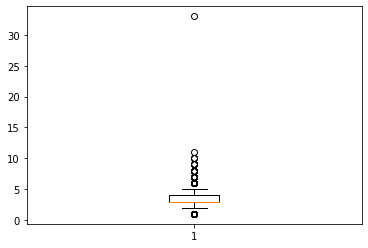

In [9]:
#outlier treatment
plt.boxplot(data['bedrooms'])
Q1 = data['bedrooms'].quantile(0.1)
Q3 = data['bedrooms'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['bedrooms'] >= Q1 - 1.5*IQR) & (data['bedrooms'] <= Q3 + 1.5*IQR)]
data.shape

(21564, 16)

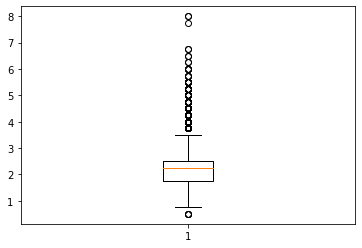

In [10]:
#outlier treatment
plt.boxplot(data['bathrooms'])
Q1 = data['bathrooms'].quantile(0.1)
Q3 = data['bathrooms'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['bathrooms'] >= Q1 - 1.5*IQR) & (data['bathrooms'] <= Q3 + 1.5*IQR)]
data.shape

(21529, 16)

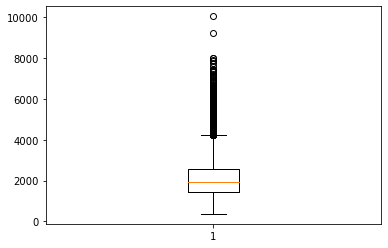

In [11]:
#outlier treatment
plt.boxplot(data['sqft_living'])
Q1 = data['sqft_living'].quantile(0.1)
Q3 = data['sqft_living'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_living'] >= Q1 - 1.5*IQR) & (data['sqft_living'] <= Q3 + 1.5*IQR)]
data.shape

(20610, 16)

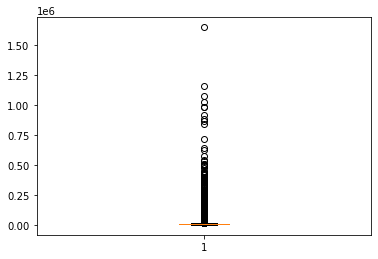

In [12]:
#outlier treatment
plt.boxplot(data['sqft_lot'])
Q1 = data['sqft_lot'].quantile(0.1)
Q3 = data['sqft_lot'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_lot'] >= Q1 - 1.5*IQR) & (data['sqft_lot'] <= Q3 + 1.5*IQR)]
data.shape

(20605, 16)

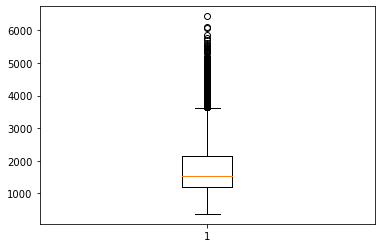

In [13]:
#outlier treatment
plt.boxplot(data['sqft_above'])
Q1 = data['sqft_above'].quantile(0.1)
Q3 = data['sqft_above'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_above'] >= Q1 - 1.5*IQR) & (data['sqft_above'] <= Q3 + 1.5*IQR)]
data.shape

(20599, 16)

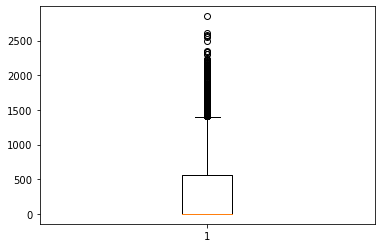

In [14]:
 #outlier treatment
plt.boxplot(data['sqft_basement'])
Q1 = data['sqft_basement'].quantile(0.1)
Q3 = data['sqft_basement'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_basement'] >= Q1 - 1.5*IQR) & (data['sqft_basement'] <= Q3 + 1.5*IQR)]
data.shape

(20591, 16)

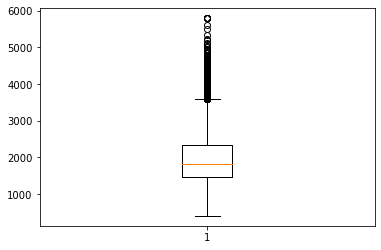

In [15]:
#outlier treatment
plt.boxplot(data['sqft_living15'])
Q1 = data['sqft_living15'].quantile(0.1)
Q3 = data['sqft_living15'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_living15'] >= Q1 - 1.5*IQR) & (data['sqft_living15'] <= Q3 + 1.5*IQR)]
data.shape

(19931, 16)

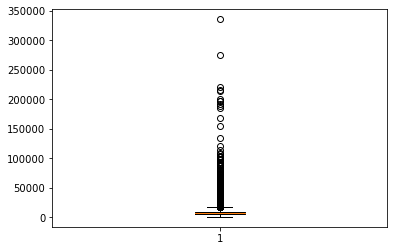

In [16]:
#outlier treatment
plt.boxplot(data['sqft_lot15'])
Q1 = data['sqft_lot15'].quantile(0.1)
Q3 = data['sqft_lot15'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['sqft_lot15'] >= Q1 - 1.5*IQR) & (data['sqft_lot15'] <= Q3 + 1.5*IQR)]
data.shape

(19693, 16)

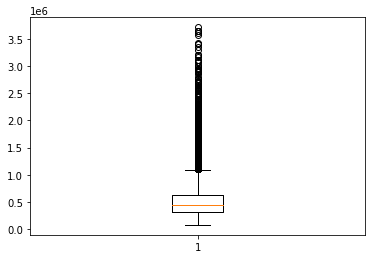

In [17]:
#outlier treatment
plt.boxplot(data['price'])
Q1 = data['price'].quantile(0.1)
Q3 = data['price'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['price'] >= Q1 - 1.5*IQR) & (data['price'] <= Q3 + 1.5*IQR)]
data.shape

In [18]:
data.describe(percentiles = [.25,.5,.75,.90,.95,.99])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,1.969300e+04,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000,19693.000000
mean,5.031112e+05,3.341543,2.067169,1985.972325,8097.269131,1.484715,0.003910,0.204895,3.411263,7.562484,1704.879653,281.092673,47.561394,-122.225533,1920.664195,7644.634540
std,2.677297e+05,0.881421,0.727944,799.575154,5360.742282,0.542590,0.062409,0.706397,0.651962,1.076694,731.543417,418.064528,0.137101,0.133831,631.825857,4058.653746
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.150000e+05,3.000000,1.500000,1400.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,47.476900,-122.334000,1460.000000,5000.000000
50%,4.390000e+05,3.000000,2.250000,1850.000000,7272.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,47.571900,-122.258000,1790.000000,7350.000000
75%,6.200000e+05,4.000000,2.500000,2440.000000,9668.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2100.000000,550.000000,47.678900,-122.148000,2260.000000,9395.000000
90%,8.399000e+05,4.000000,3.000000,3080.000000,13481.000000,2.000000,0.000000,0.000000,4.000000,9.000000,2770.000000,930.000000,47.726300,-122.033000,2800.000000,12050.600000
95%,1.010000e+06,5.000000,3.250000,3490.000000,17675.200000,2.000000,0.000000,2.000000,5.000000,10.000000,3180.000000,1120.000000,47.747640,-121.997000,3140.000000,15060.600000
99%,1.490000e+06,6.000000,4.000000,4340.000000,30086.120000,3.000000,0.000000,4.000000,5.000000,11.000000,3920.000000,1540.000000,47.772800,-121.841000,3860.000000,22673.200000


In [19]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [20]:
data['bathrooms'] = np.round(data['bathrooms'])
data['floors'] = np.round(data['floors'])

<AxesSubplot:>

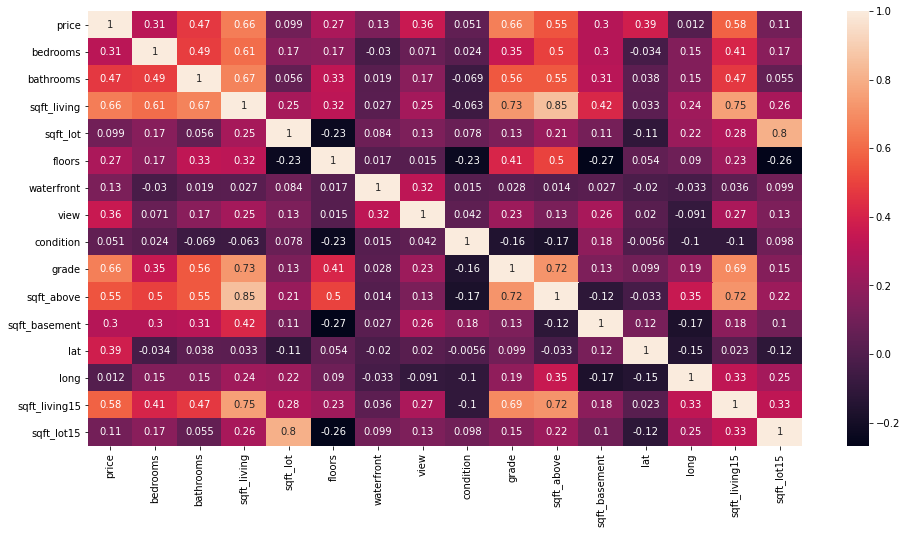

In [21]:
plt.figure(figsize= (16,8))
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:>

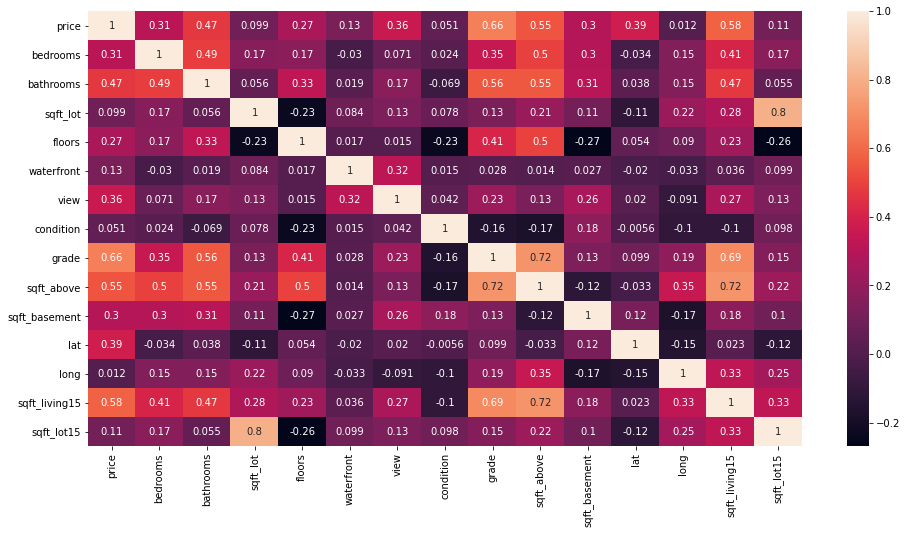

In [22]:
data1 = data.drop('sqft_living',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data1.corr(),annot=True)

<AxesSubplot:>

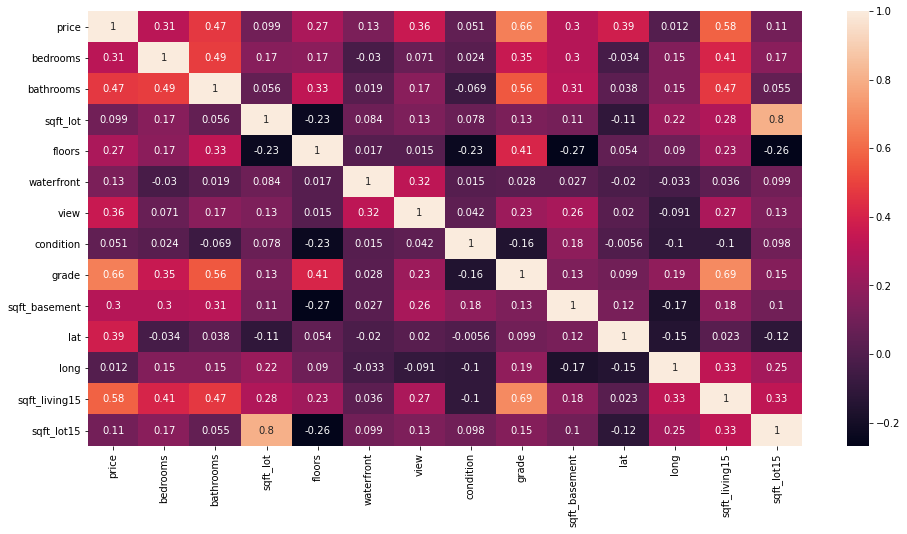

In [23]:
data2 = data1.drop('sqft_above',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data2.corr(),annot=True)

<AxesSubplot:>

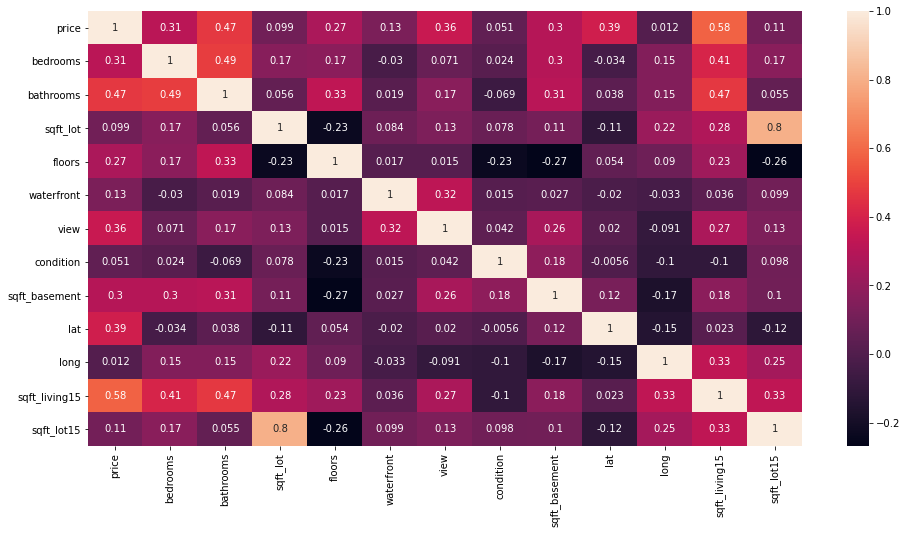

In [24]:
data3 = data2.drop('grade',axis=1)
plt.figure(figsize= (16,8))
sns.heatmap(data3.corr(),annot=True)

# model

In [25]:
data = data3.iloc[:1000]
y = data.pop('price')
X = data

In [26]:
y=np.log(y)
y

0       12.309982
1       13.195614
2       12.100712
3       13.311329
4       13.142166
          ...    
1097    12.560244
1098    11.925035
1100    13.355061
1101    12.560244
1102    12.180755
Name: price, Length: 1000, dtype: float64

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
num_vars = data.columns

num_vars = list(num_vars)

X[num_vars] = scaler.fit_transform(X[num_vars])

X.head(10)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,-0.377673,-1.473166,-0.530218,-0.877165,-0.054855,-0.291314,-0.679199,-0.680138,-0.278296,-0.259007,-0.935188,-0.560305
1,-0.377673,0.089046,-0.247397,0.989143,-0.054855,-0.291314,-0.679199,0.251079,1.218211,-0.733336,-0.353754,-0.077426
2,-1.569068,-1.473166,0.242564,-0.877165,-0.054855,-0.291314,-0.679199,-0.680138,1.338759,-0.075395,1.357322,0.025268
3,0.813723,1.651258,-0.645691,-0.877165,-0.054855,-0.291314,2.248384,1.438381,-0.209819,-1.299471,-0.901963,-0.718109
4,-0.377673,0.089046,-0.098526,-0.877165,-0.054855,-0.291314,-0.679199,-0.680138,0.474951,1.362893,-0.171018,-0.110443
6,-0.377673,0.089046,-0.322544,0.989143,-0.054855,-0.291314,-0.679199,-0.680138,-1.715599,-0.794540,0.556605,-0.276501
7,-0.377673,0.089046,0.191223,-0.877165,-0.054855,-0.291314,-0.679199,-0.680138,-1.003724,-0.702734,-0.420204,0.425603
8,-0.377673,-1.473166,-0.206893,-0.877165,-0.054855,-0.291314,-0.679199,1.019333,-0.270450,-0.871044,-0.204243,0.037649
9,-0.377673,0.089046,-0.368555,0.989143,-0.054855,-0.291314,-0.679199,-0.680138,-1.296891,1.470000,0.809113,-0.094177
10,-0.377673,0.089046,0.206324,-0.877165,-0.054855,-0.291314,-0.679199,3.277534,0.360109,0.597846,0.510090,0.234782


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [30]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [31]:
y_pred = regressor.predict(X_test)

In [32]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.5784437699914855

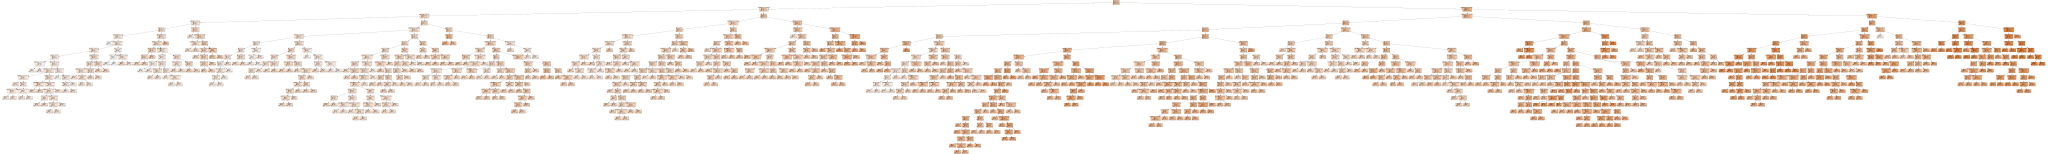

In [33]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(regressor, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [34]:
from sklearn.metrics import roc_auc_score
# Allow a decision tree to grow to its full depth
clf = DecisionTreeRegressor(random_state = 0)
clf.fit(X_train, y_train)

# compute ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# train DT classifier for each ccp_alpha value
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Plot train and test score for each of the above trained model    
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

train_scores = [r2_score(y_train, clf.predict(X_train)) for clf in clfs]
test_scores = [r2_score(y_test, clf.predict(X_test)) for clf in clfs]



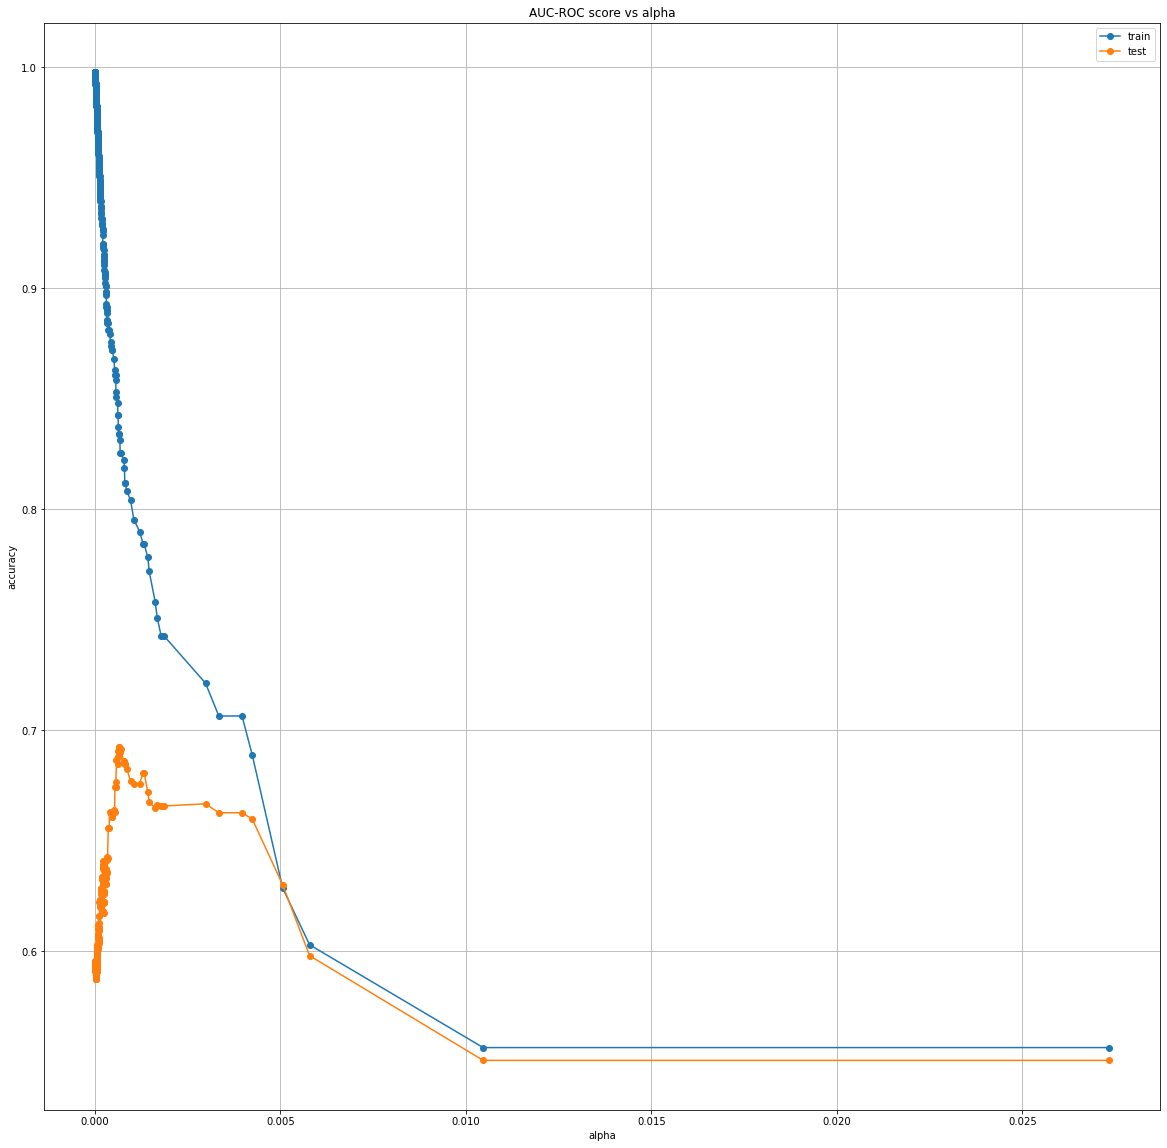

<Figure size 1440x1440 with 0 Axes>

In [35]:
fig, ax = plt.subplots(figsize = (20,20))
plt.grid()
#plt.xlim(0.000, 0.004)
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("AUC-ROC score vs alpha")
ax.plot(ccp_alphas, train_scores, marker='o', label="train")
ax.plot(ccp_alphas, test_scores, marker='o', label="test")
ax.legend()
plt.figure(figsize = (20,20))
plt.show()

In [36]:
clf = DecisionTreeRegressor(random_state=42, ccp_alpha=0.0006)
clf.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0006, random_state=42)

In [37]:
pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
r2_score(y_test, pred)

0.6907710651227699

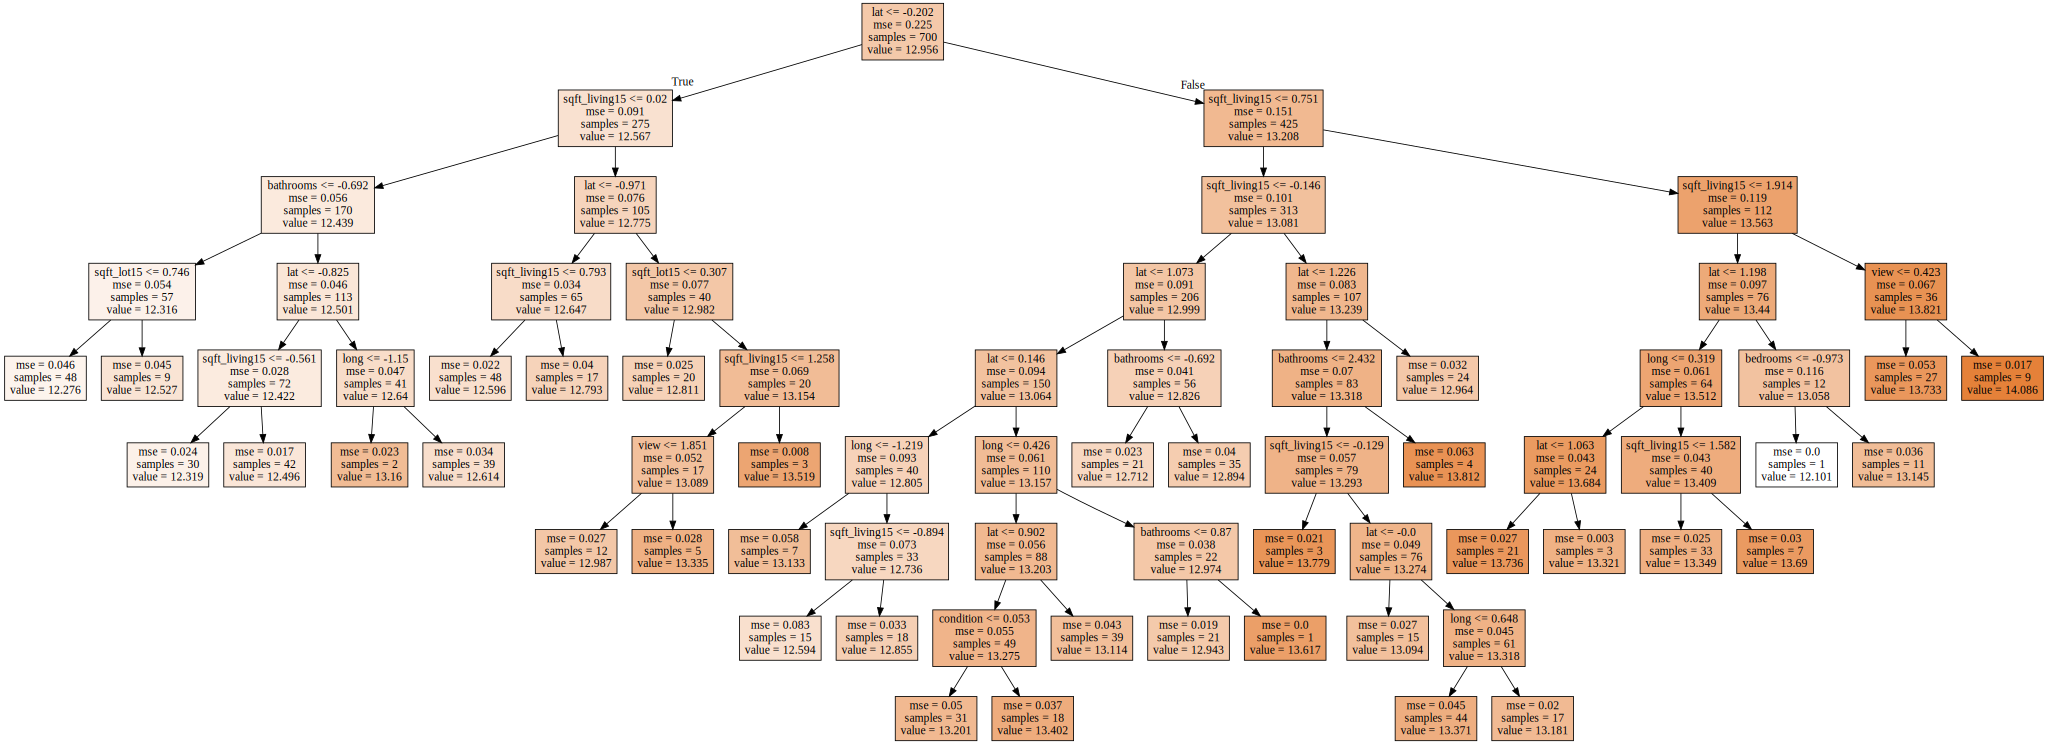

In [38]:
import graphviz
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph